# 翟工基于k-means算法根据draught判断是装货还是卸货

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [4]:
beer = pd.read_csv(r"./354526000.txt", sep=',',names=['mmsi','updatetime','lon','lat','course','speed','heading','rot','status','static_info_updatetime','eta','dest','destination_tidied','draught'],usecols=['updatetime','speed','draught'])

old_speed_updatetime = beer[['updatetime','speed']]    # 制作v0
# print('原始两列')
# print(old_speed_updatetime)

old_speed_updatetime111=old_speed_updatetime.drop(0)                         # 删除第一行
# print('删除第一行')
# print(old_speed_updatetime111)

last_line=old_speed_updatetime.iloc[len(old_speed_updatetime)-1]     # 取最后一行
# print('取最后一行')
# print(last_line)

old_speed_updatetime222=old_speed_updatetime111.append(last_line, ignore_index=True)    # 重复最后一行
# print('重复最后一行')
# print(old_speed_updatetime222)


beer['speed_v0']=old_speed_updatetime222['speed']                   # 把两行加到原始dataFrame上去
beer['updatetime_t0']=old_speed_updatetime222['updatetime']
print(beer)

beer['updatetime'] = pd.to_datetime(beer['updatetime'])            # 2017-07-11 21:38:24   str转datetime类型
beer['updatetime_t0'] = pd.to_datetime(beer['updatetime_t0'])      # 2017-07-11 21:38:24   str转datetime类型
beer.dtypes

beer['diff_time'] = (beer['updatetime_t0'] - beer['updatetime']).dt.seconds/60         # 计算diff_ime
print("增加diff_time")
print(beer)


beer['acceleration']=(beer['speed_v0']-beer['speed'])/beer['diff_time']       # 新增一列加速度
print("增加acceleration")

beer['acceleration']=beer['acceleration'].fillna(0)         # 将加速度NaN补为0
print(beer)


                 updatetime  speed  draught  speed_v0        updatetime_t0
0       2021-01-01 00:23:36   12.4      9.9      12.4  2021-01-01 00:23:46
1       2021-01-01 00:23:46   12.4      9.9      12.4  2021-01-01 00:25:07
2       2021-01-01 00:25:07   12.4      9.9      12.2  2021-01-01 00:32:49
3       2021-01-01 00:32:49   12.2      9.9      12.2  2021-01-01 00:33:59
4       2021-01-01 00:33:59   12.2      9.9      12.2  2021-01-01 00:34:08
...                     ...    ...      ...       ...                  ...
221241  2021-04-28 23:51:30   10.8     18.0      10.8  2021-04-28 23:52:39
221242  2021-04-28 23:52:39   10.8     18.0      10.7  2021-04-28 23:53:51
221243  2021-04-28 23:53:51   10.7     18.0      10.7  2021-04-28 23:55:01
221244  2021-04-28 23:55:01   10.7     18.0      10.7  2021-04-28 23:56:10
221245  2021-04-28 23:56:10   10.7     18.0      10.7  2021-04-28 23:56:10

[221246 rows x 5 columns]
增加diff_time
                updatetime  speed  draught  speed_v0       up

             draught
count  221246.000000
mean       13.458849
std         3.931317
min         2.900000
25%         9.900000
50%        10.100000
75%        18.000000
max        18.000000


C:\development\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


        draught  cluster
0           9.9        0
1           9.9        0
2           9.9        0
3           9.9        0
4           9.9        0
...         ...      ...
221241     18.0        1
221242     18.0        1
221243     18.0        1
221244     18.0        1
221245     18.0        1

[221246 rows x 2 columns]
   cluster    draught
0        0   9.938561
1        1  17.999986
2        2  12.598501


Text(0, 0.5, 'draught')

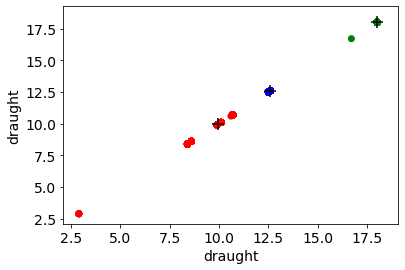

In [5]:
X= beer[['draught']]
# X = (X-X.min())/(X.max()-X.min())
print(X.describe())
km = KMeans(n_clusters=3).fit(X)  

X['cluster'] = km.labels_    # 将训练结果新增到beer的cluster列（0-1-2-1-2-0-2-2-1......）
print(X)

plt.rcParams['font.size'] = 14     # 设置绘图样式plt字体大小
colors = np.array(['red', 'green', 'blue', 'yellow'])     # 簇为0位red，簇为1位green

plt.scatter(X['draught'], X['draught'], c=colors[X['cluster']])         # 画data
centers = X.groupby('cluster').mean().reset_index()    # 每个簇的原始数据计算各个属性平均值
print(centers)           # 画质心
plt.scatter(centers['draught'], centers['draught'], marker='+', s=150, c='black')

plt.xlabel('draught')
plt.ylabel('draught')

# 有了两个质心，新来一条数据就调kmeans一次
9.985294、6.508333是算法计算出的质心，8.221是测试数据

In [4]:
data = {'draught': ['9.985294', '6.508333', '8.221']}
df= pd.DataFrame(data)
lastkm = KMeans(n_clusters=2).fit(df)  
df['cluster'] = lastkm.labels_    # 将训练结果新增到beer的cluster列（0-1-2-1-2-0-2-2-1......）
print(df)

    draught  cluster
0  9.985294        0
1  6.508333        1
2     8.221        1
